**Introducción**

Nodo (Parada):
- Nombre: Denominacion
- Código de la estación: CodigoEstacion

Relación (Línea):
- Línea: NumeroLineaUsuario
- Tiempo: LongitudTramoAnterior / VelocidadTramoAnterior

In [53]:
import pandas as pd
df = pd.read_csv('./INPUT/M4_ParadasPorItinerario.csv', usecols=[4,5,7,10,13,22,23])
df

,NUMEROLINEAUSUARIO,SENTIDO,CODIGOESTACION,NUMEROORDEN,DENOMINACION,LONGITUDTRAMOANTERIOR,VELOCIDADTRAMOANTERIOR
0,10b,1,278,7,LA GRANJA,2061.134509,37.18
1,10b,2,278,5,LA GRANJA,1497.633199,37.18
2,10b,1,279,6,LA MORALEJA,1325.800516,37.18
3,10b,2,279,6,LA MORALEJA,2057.302872,37.18
4,10b,1,280,5,MARQUES DE LA VALDAVIA,1514.584317,37.18
...,...,...,...,...,...,...,...
585,10b,2,282,9,BAUNATAL,1112.447862,37.18
586,10b,1,283,2,REYES CATOLICOS,1556.360052,37.18
587,10b,2,283,10,REYES CATOLICOS,1086.744262,37.18
588,10b,1,284,1,HOSPITAL INFANTA SOFIA,0.000000,0.00


In [54]:
df_filtrado = df[df['SENTIDO'] == 1]
df_limpio = df_filtrado.drop_duplicates(subset=['CODIGOESTACION', 'NUMEROLINEAUSUARIO'], keep='first', inplace=False)
df_limpio

,NUMEROLINEAUSUARIO,SENTIDO,CODIGOESTACION,NUMEROORDEN,DENOMINACION,LONGITUDTRAMOANTERIOR,VELOCIDADTRAMOANTERIOR
0,10b,1,278,7,LA GRANJA,2061.134509,37.18
2,10b,1,279,6,LA MORALEJA,1325.800516,37.18
4,10b,1,280,5,MARQUES DE LA VALDAVIA,1514.584317,37.18
6,10b,1,281,4,MANUEL DE FALLA,1108.192304,37.18
8,10a,1,204,20,JOAQUIN VILUMBRALES,3272.364045,31.12
...,...,...,...,...,...,...,...
580,7b,1,291,3,JARAMA,921.216300,33.38
582,7b,1,292,2,HENARES,686.929700,33.38
584,10b,1,282,3,BAUNATAL,1085.922078,37.18
586,10b,1,283,2,REYES CATOLICOS,1556.360052,37.18


In [124]:
lineas = df_limpio['NUMEROLINEAUSUARIO'].unique().tolist()
df_line = df_limpio[df_limpio['NUMEROLINEAUSUARIO'] == '12-1'].sort_values(by='NUMEROORDEN')
df_line


,NUMEROLINEAUSUARIO,SENTIDO,CODIGOESTACION,NUMEROORDEN,DENOMINACION,LONGITUDTRAMOANTERIOR,VELOCIDADTRAMOANTERIOR
16,12-1,1,210,2,PARQUE LISBOA,841.921,40.53
18,12-1,1,211,3,ALCORCON CENTRAL,1278.985,40.53
21,12-1,1,212,4,PARQUE OESTE,1566.990,40.53
566,12-1,1,213,5,UNIVERSIDAD REY JUAN CARLOS,2607.765,40.53
568,12-1,1,214,6,MOSTOLES CENTRAL,1306.587,40.53
571,12-1,1,215,7,PRADILLO,698.708,40.53
562,12-1,1,216,8,HOSPITAL DE MOSTOLES,1031.324,40.53
564,12-1,1,217,9,MANUELA MALASAÑA,1598.815,40.53
34,12-1,1,218,10,LORANCA,2902.405,40.53
36,12-1,1,219,11,HOSPITAL DE FUENLABRADA,2277.737,40.53


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np


G = nx.Graph()
# Añadimos los nodos al grafo
for i_parada, parada in df_limpio.iterrows():
    if parada['DENOMINACION'] in G:
        continue
    G.add_node(parada['DENOMINACION'], name=parada['DENOMINACION'], station_code=parada['CODIGOESTACION'])

# Añadimos las relaciones a los nodos
for line in df_limpio['NUMEROLINEAUSUARIO'].unique().tolist():
    df_line = df_limpio[df_limpio['NUMEROLINEAUSUARIO'] == line].sort_values(by='NUMEROORDEN')
    paradas = list(df_line.iterrows())

    if "-2" in line:
        continue

    for i_parada in range(len(paradas) - 1): # Ignorar la última parada
        i, parada = paradas[i_parada]
        i_next, parada_next = paradas[i_parada + 1]
        tiempo = parada_next['LONGITUDTRAMOANTERIOR'] / parada_next['VELOCIDADTRAMOANTERIOR'] if parada_next['VELOCIDADTRAMOANTERIOR'] != 0 else 0
        G.add_edge(parada['DENOMINACION'], parada_next['DENOMINACION'], line=line, time=tiempo) 

    if "-" in line:
        i, parada0 = paradas[0]
        i_ult, parada_ult = paradas[len(paradas)-1]
        print(parada0['DENOMINACION'], parada_ult['DENOMINACION'])
        tiempo = parada_ult['LONGITUDTRAMOANTERIOR'] / parada_ult['VELOCIDADTRAMOANTERIOR'] if parada_ult['VELOCIDADTRAMOANTERIOR'] != 0 else 0
        G.add_edge(parada0['DENOMINACION'], parada_ult['DENOMINACION'], line=line, time=tiempo)


# Crear el grafo a partir del DataFrame
grafo_metro = G
grafo_metro

PARQUE LISBOA PUERTA DEL SUR
LAGUNA LUCERO


In [131]:
nx.write_gexf(grafo_metro, 'grafo.gexf')

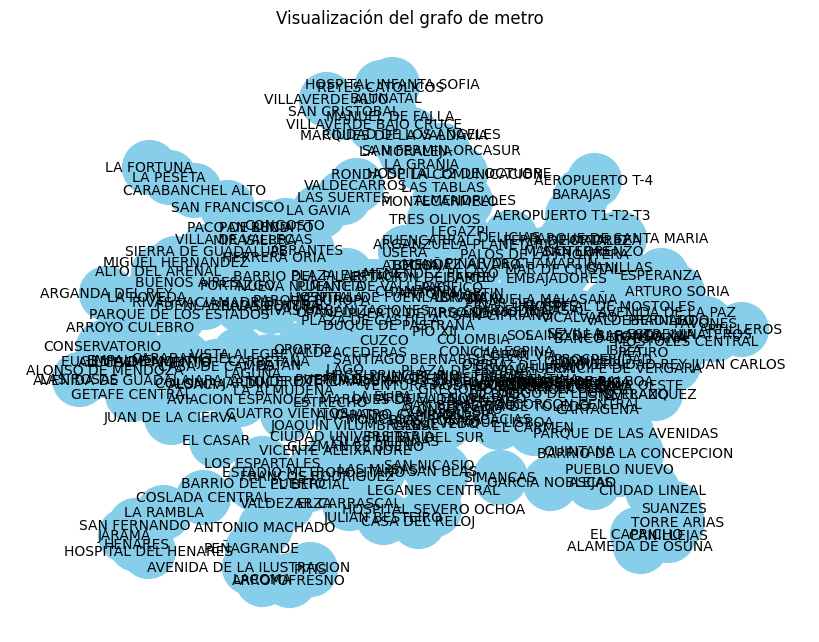

In [134]:
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el archivo GEXF
G = nx.read_gexf("grafo.gexf")

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', font_size=10)
plt.title("Visualización del grafo de metro")
plt.show()

In [133]:
bet_centr = nx.betweenness_centrality(grafo_metro, k=20, normalized=True)
top10_bet = sorted(bet_centr.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (betweenness centrality):", top10_bet)

Top 10 (betweenness centrality): [('PRINCIPE PIO', 0.38248860018880765), ('CASA DE CAMPO', 0.3676093245735362), ('COLONIA JARDIN', 0.354381051175657), ('AVIACION ESPAÑOLA', 0.3527074688796681), ('CUATRO VIENTOS', 0.3510338865836791), ('JOAQUIN VILUMBRALES', 0.3493603042876902), ('LAGO', 0.34836312816966347), ('BATAN', 0.3466895458736745), ('GREGORIO MARAÑON', 0.33851663661661063), ('ALONSO MARTINEZ', 0.3157277753079102)]


In [136]:
closeness_dict = nx.closeness_centrality(grafo_metro.to_undirected())
top10_closeness = sorted(closeness_dict.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (closeness centrality, sin dirección):", top10_closeness)

Top 10 (closeness centrality, sin dirección): [('GREGORIO MARAÑON', 0.1110087517273146), ('ALONSO MARTINEZ', 0.11090658076392085), ('TRIBUNAL', 0.10831460674157303), ('AVENIDA DE AMERICA', 0.10802330793366204), ('NUÑEZ DE BALBOA', 0.10635481023830538), ('RUBEN DARIO', 0.105562855891371), ('BILBAO', 0.1052861511577108), ('NUEVOS MINISTERIOS', 0.10524017467248908), ('PLAZA DE ESPAÑA', 0.10501089324618737), ('DIEGO DE LEON', 0.10401381096245145)]


In [135]:
G2 = nx.read_gexf("grafo.gexf")

with open("edges.txt", "w") as f:
    for u, v in G2.edges():
        f.write(f"{u} {v}\n")